<h1>Websraping, cleaning and visualisation of Formula 1 data</h1>
<p><span style="font-weight:bold;">Tools used</span> : <span style="color:#434545">requests, BeautifulSoup, Pandas, matplotlib & seaborn</span></p>

<h3>Webscraping using requests and Beautifulsoup</h3>

In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [79]:
year_competition = 2019 #choose year between 1950 and previous year to get data from chosen period
url = f"https://www.formula1.com/en/results.html/{year_competition}/drivers.html"
r = requests.get(url).text
soup = BeautifulSoup(r,"lxml")

In [80]:
table = soup.find("table",class_="resultsarchive-table")
col_names_row = table.thead
col_names = []
for name in col_names_row.find_all("th")[1:-1]:
    col_names.append(name.text)
col_names #column names    

['Pos', 'Driver', 'Nationality', 'Car', 'PTS']

In [81]:
driver_rows = table.tbody.find_all("tr")
drivers = []
for driver_row in driver_rows:
    driver = {}
    for index,info in enumerate(driver_row.find_all("td")[1:-1]):
        driver[col_names[index]] = info.text.replace("\n","")
    drivers.append(driver)  
drivers[0] #example   

{'Pos': '1',
 'Driver': 'LewisHamiltonHAM',
 'Nationality': 'GBR',
 'Car': 'Mercedes',
 'PTS': '413'}

<h3>Data cleaning using Pandas</h3>

In [82]:
df = pd.DataFrame(drivers)
df

,Pos,Driver,Nationality,Car,PTS
0,1,LewisHamiltonHAM,GBR,Mercedes,413
1,2,ValtteriBottasBOT,FIN,Mercedes,326
2,3,MaxVerstappenVER,NED,Red Bull Racing Honda,278
3,4,CharlesLeclercLEC,MON,Ferrari,264
4,5,SebastianVettelVET,GER,Ferrari,240
5,6,CarlosSainzSAI,ESP,McLaren Renault,96
6,7,PierreGaslyGAS,FRA,Scuderia Toro Rosso Honda,95
7,8,AlexanderAlbonALB,THA,Red Bull Racing Honda,92
8,9,DanielRicciardoRIC,AUS,Renault,54
9,10,SergioPerezPER,MEX,Racing Point BWT Mercedes,52


In [83]:
#split string when capital letter occurs
import re

def split_on_uppercase(name):
    return re.findall(r'[A-Z][^A-Z]*', name)

In [84]:
df.set_index("Pos",inplace=True)
df["PTS"] = df["PTS"].astype("float")
splited_names = df["Driver"].apply(split_on_uppercase)
df["Initials"] = splited_names.apply(lambda x : "".join(x[2:]))
df["Driver"] = splited_names.apply(lambda x: " ".join(x[0:2]))
col = df.columns.tolist()
df = df[col[:1]+col[-1:]+col[1:-1]]

<h4>Metadata</h4>
<ul>
  <li><span style="font-weight:bold">Pos</span> - final driver position at the end of the season</li>
  <li><span style="font-weight:bold">Driver</span> - full name of driver</li>
  <li><span style="font-weight:bold">Initials</span> - abbreviation of the name</li>
  <li><span style="font-weight:bold">Nationality</span> - abbreviation of the driver's home nation's name </li>
  <li><span style="font-weight:bold">Car</span> - team to which the driver belongs</li>
  <li><span style="font-weight:bold">PTS</span>- total points at the end of the season</li>
</ul>

In [85]:
df

,Driver,Initials,Nationality,Car,PTS
Pos,,,,,
1,Lewis Hamilton,HAM,GBR,Mercedes,413.0
2,Valtteri Bottas,BOT,FIN,Mercedes,326.0
3,Max Verstappen,VER,NED,Red Bull Racing Honda,278.0
4,Charles Leclerc,LEC,MON,Ferrari,264.0
5,Sebastian Vettel,VET,GER,Ferrari,240.0
6,Carlos Sainz,SAI,ESP,McLaren Renault,96.0
7,Pierre Gasly,GAS,FRA,Scuderia Toro Rosso Honda,95.0
8,Alexander Albon,ALB,THA,Red Bull Racing Honda,92.0
9,Daniel Ricciardo,RIC,AUS,Renault,54.0


<h3>Visualisation using matplotlib and seaborn</h3>

In [86]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

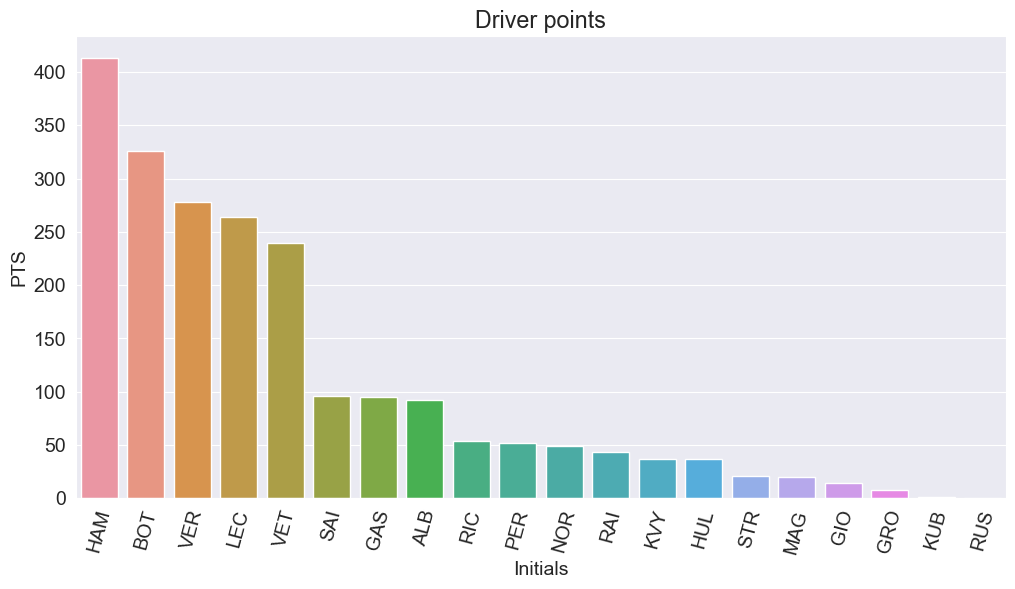

In [87]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Driver points")
sns.barplot(x=df["Initials"], y=df["PTS"]);

In [88]:
points_by_team = df.groupby("Car")["PTS"].sum().sort_values(ascending=False)

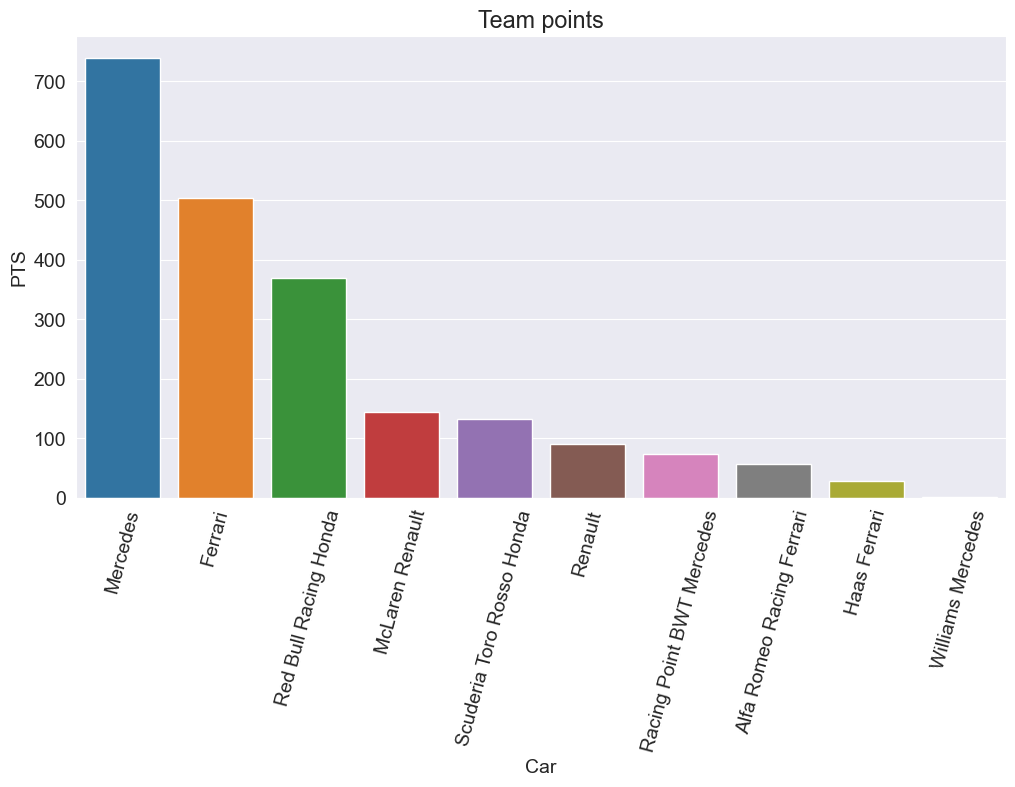

In [94]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Team points")
sns.barplot(x=points_by_team.index, y=points_by_team);

<h4>Source: </h4><a href="https://www.formula1.com/en/results.html">https://www.formula1.com/en/results.html</a>